<a href="https://colab.research.google.com/github/Gab2697/Human-Activity-Recognition/blob/master/Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code description: 

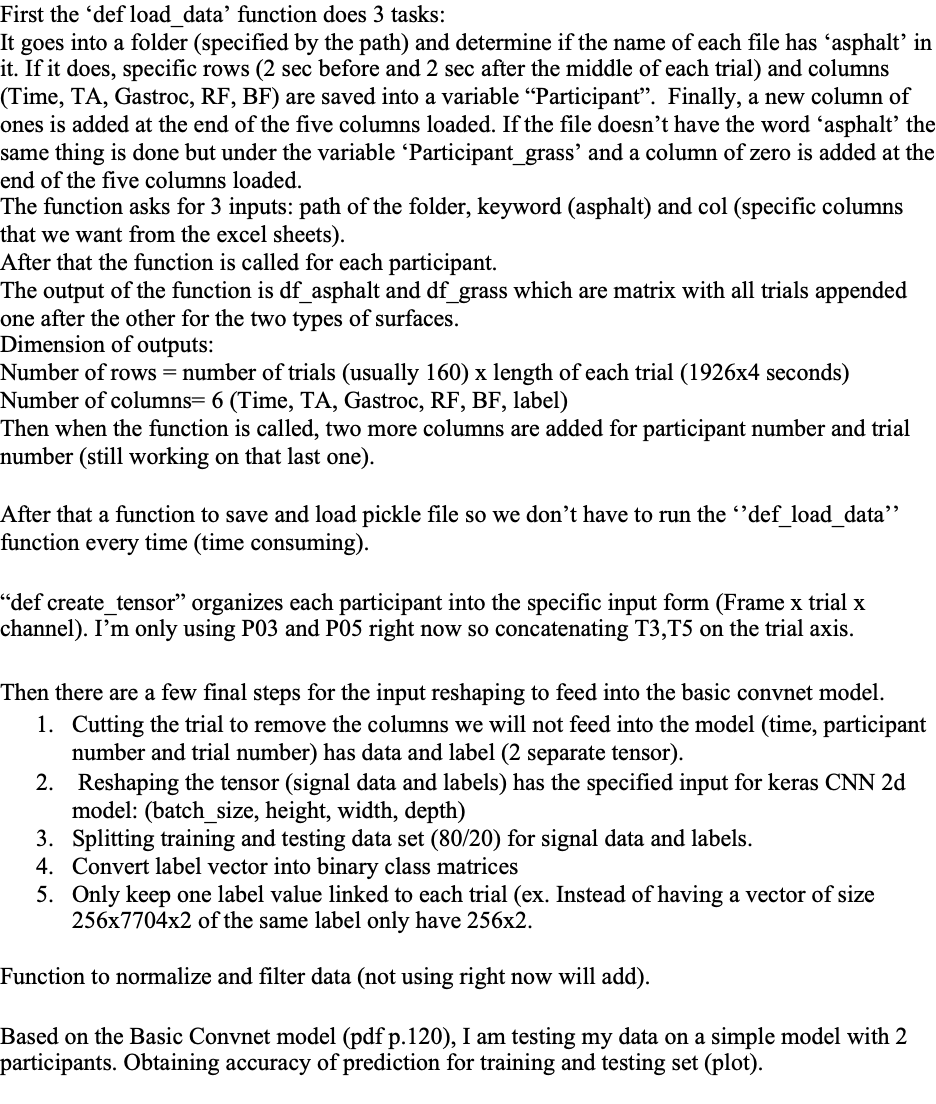

In [4]:
#import
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prepare the data

Function to load data, organize it by surface and add a specifique label depending on the name of the excel file

In [17]:
def load_data(path,keyword,col):

  Window=1926*2 
  df_asphalt = pd.DataFrame()
  df_grass = pd.DataFrame()
  for fname in os.listdir(path):
    if keyword in fname: 
      os.chdir(path)
      pd_xl_file = pd.ExcelFile(fname)
      df = pd_xl_file.parse("Sheet1") 
      dimensions = df.shape
      Middle=int(dimensions[0]/2)
      Participant=pd.read_excel(fname,sheet_name='Sheet1',  usecols = col)
      Participant['label'] = pd.DataFrame(np.ones(dimensions[0]),dtype=int)
      Participant=Participant.iloc[Middle-Window:Middle+Window]
      df_asphalt = df_asphalt.append(Participant)
      

    else:
      os.chdir(path)
      pd_xl_file_grass = pd.ExcelFile(fname)
      df2 = pd_xl_file_grass.parse("Sheet1") 
      dimensions_grass = df2.shape
      Middle_grass=int(dimensions_grass[0]/2)
      Participant_grass=pd.read_excel(fname,sheet_name='Sheet1', usecols = col)
      Participant_grass['label'] = pd.DataFrame(np.zeros(dimensions_grass[0]),dtype=int)
      Participant_grass=Participant_grass.iloc[Middle_grass-Window:Middle_grass+Window]
      df_grass = df_grass.append(Participant_grass)
      
  return df_asphalt, df_grass

Call load function and add specific columns (participant and trial number)

In [ ]:
#P01
path1= '/content/drive/MyDrive/Gab/P01/exported-1/'
df_asphalt_1, df_grass_1= load_data(path1,'sidewalk',"A,B,J,R,Z")
df_asphalt_1['participant_number']=1#add column for participant number
df_grass_1['participant_number']=1#add column for participant number
# df_asphalt_1['trial_number']=list(range(1,len(df_asphalt_1)+1),len(df_asphalt_1)/(1926*4))#add column for trial number
# df_grass_1['trial_number']=list(range(1,len(df_grass_1)+1),len(df_grass_1)/(1926*4))#add column for trial number
#P03
path3= '/content/drive/MyDrive/Gab/P03/exported-emg/'
df_asphalt_3, df_grass_3= load_data(path3,'asphalt',"A,B,D,L,T")
df_asphalt_3['participant_number']=3
df_grass_3['participant_number']=3
# df_asphalt_3['trial_number']=list(range(1,len(df_asphalt_3)+1),len(df_asphalt_3)/(1926*4))
# df_grass_3['trial_number']=list(range(1,len(df_grass_3)+1),len(df_grass_3)/(1926*4))
#P05
path5= '/content/drive/MyDrive/Gab/P05/exported-emg-5/'
df_asphalt_5, df_grass_5= load_data(path5,'asphalt',"A,B,D,L,T")
df_asphalt_5['participant_number']=5
df_grass_5['participant_number']=5
# df_asphalt_5['trial_number']=list(range(1,len(df_asphalt_5)+1),len(df_asphalt_5)/(1926*4))
# df_grass_5['trial_number']=list(range(1,len(df_grass_5)+1),len(df_grass_5)/(1926*4))
#P07
path7= '/content/drive/MyDrive/Gab/P07/exported-emg-7/'
df_asphalt_7, df_grass_7= load_data(path7,'asphalt',"A,B,D,L,T")
df_asphalt_7['participant_number']=7
df_grass_7['participant_number']=7
# df_asphalt_7['trial_number']=list(range(1,len(df_asphalt_7)+1),len(df_asphalt_7)/(1926*4))
# df_grass_7['trial_number']=list(range(1,len(df_grass_7)+1),len(df_grass_7)/(1926*4))
#P09
path9= '/content/drive/MyDrive/Gab/P09/exported-emg-9/'
df_asphalt_9, df_grass_9= load_data(path9,'asphalt',"A,B,D,L,T") 
df_asphalt_9['participant_number']=9
df_grass_9['participant_number']=9
# df_asphalt_9['trial_number']=list(range(1,len(df_asphalt_9)+1),len(df_asphalt_9)/(1926*4))
# df_grass_9['trial_number']=list(range(1,len(df_grass_9)+1),len(df_grass_9)/(1926*4))

Functions to save and open pickle files

In [21]:
#only do once
def save_pickle(path_pickle,T):
  f = open(path_pickle, 'wb')
  pickle.dump(T, f)
  f.close()

  return f 

In [5]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  T = pickle.load(f)
  f.close()

  return T

In [22]:
#save
f7_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_g.pickle',df_grass_7)
f7_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_a.pickle',df_asphalt_7)
f9_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_g.pickle',df_grass_9)
f9_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_a.pickle',df_asphalt_9)

In [6]:
#load
df_grass_3= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P03_g.pickle')
df_asphalt_3= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P03_a.pickle')
df_grass_5= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P05_g.pickle')
df_asphalt_5= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P05_a.pickle')
df_grass_7= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_g.pickle')
df_asphalt_7= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_a.pickle')
df_grass_9= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_g.pickle')
df_asphalt_9= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_a.pickle')

Data visualization

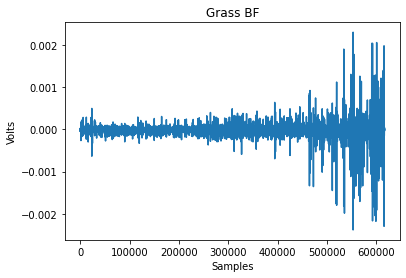

In [60]:
#visualization of data P03 grass
len_grass9= list(range(0,len(df_grass_9.iloc[:,0])))
plt.plot(len_grass9,df_grass_9.iloc[:,3]) 
plt.title('Grass BF') 
plt.xlabel('Samples')
plt.ylabel('Volts')
plt.show()

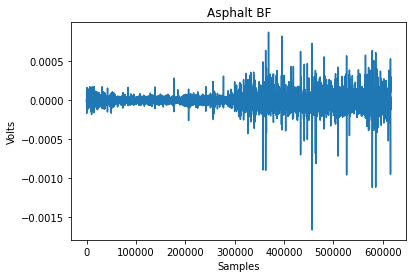

In [62]:
#visualization of data P03 aspahlt
len_asphalt9= list(range(0,len(df_asphalt_9.iloc[:,0])))
plt.plot(len_asphalt9,df_asphalt_9.iloc[:,3]) 
plt.title('Asphalt BF') 
plt.xlabel('Samples')
plt.ylabel('Volts')
plt.show()

Add column for trial numnber

In [ ]:
#NOT RUNNING RIGHT NOW
#asphalt
skip_asphalt_3=list(range(1,len(df_grass_5)+1,round(len(df_grass_5)/(1926*4))))
skip_asphalt_3=np.array(skip_asphalt_3)
for cnt in range(1,len(df_asphalt_3)):
  if cnt==(skip_asphalt_3).any(): 
    cnt=+1
    df_asphalt_3['trial_number']=cnt
  else:
    df_asphalt_3['trial_number']=cnt 

  df_asphalt_3['trial_number'].append(cnt) 
#grass
# skip_grass_3=list(range(1,len(df_grass_5)+1,round(len(df_grass_5)/(1926*4))))
# skip_grass_3=np.array(skip_grass_3)
# for cnt_g in range(1,len(df_asphalt_3)):
#   if cnt_g==skip_grass_3: 
#     cnt_g=+1  
#     df_grass_3['trial_number']=cnt_g
#     df_grass_3['trial_number']=cnt_g

Creating a tensor with specific shape (frame x trial x channel)

In [8]:
def create_tensor(df_a,df_g):
  #tensor asphalt
  trials_a=len(df_a)/(1926*4) # how many trials-80
  T_asphalt=np.stack(np.split(df_a.values, trials_a), axis=1)
  #tensor grass
  trials_g=len(df_g)/(1926*4) # how many trials
  T_grass=np.stack(np.split(df_g.values, trials_g), axis=1)
  #tensor both conditions
  a=tf.constant(T_asphalt)
  g=tf.constant(T_grass)
  T = tf.concat([a, g], axis=1)

  return T

In [30]:
# T1=create_tensor(df_asphalt_1,df_grass_1)
# print("T1 shape:", T1.shape)

T3=create_tensor(df_asphalt_3,df_grass_3)
print("T3 shape:", T3.shape)

T5=create_tensor(df_asphalt_5,df_grass_5)
print("T5 shape:", T5.shape)

T7=create_tensor(df_asphalt_7,df_grass_7)
print("T7 shape:", T7.shape)

T9=create_tensor(df_asphalt_9,df_grass_9)
print("T9 shape:", T9.shape)

TT = tf.concat([T3,T5,T7,T9], axis=1)
print("Tensor_all shape:", TT.shape)

T3 shape: (7704, 160, 7)
T5 shape: (7704, 160, 7)
T7 shape: (7704, 161, 7)
T9 shape: (7704, 160, 7)
Tensor_all shape: (7704, 641, 7)


Final input data and label reshaping

In [32]:
from tensorflow.keras.utils import to_categorical

#participant size= number of trials 
participant_size_3= len(T3)
participant_size_5= len(T5)

#========Initial cutting========
#X-data with shape ((1926frames x 4sec)x(80trials x 2surfaces x n-participants) x 4channels)
X=TT[:, :, 1:5].numpy() #size: (7704, 320, 4)
#Y-categorical encoded label = 1 for asphalt and 0 for grass 
y=TT[:,:,5].numpy() 

#========Sreshaping into the specific intut format========S 
#keras CNN is looking for X= (batch_size, height, width,depth)
X_reshape = X.reshape((641,7704, 4, 1))
y=y.reshape((641,7704,1))
print("Data shape:", X_reshape.shape) 
print("Label shape:", y.shape)

#========Splitting the data into training and testing sets========S
#data set for training and testing the model
train_size= int(0.8*X_reshape.shape[0])
X_train= X_reshape[0:train_size,:,:,:]
X_test=X_reshape[train_size:X_reshape.shape[0],:,:,:]
#labels for train and test
y_train=y[0:train_size,:,:] 
y_test=y[train_size:X_reshape.shape[0],:,:]

# ========convert class vectors to binary class matrices========
label_train = to_categorical(y_train, 2)
label_test = to_categorical(y_test, 2)

#========only keeping one label for each trials========
#(instead of a complete vector of the same number)
label_train= label_train[:,0,:]
label_test=label_test[:,0,:]

print("Data shape train:",X_train.shape,"Data shape test:",X_test.shape,"Label shape train:",label_train.shape,"Label shape test:",label_test.shape)

Data shape: (641, 7704, 4, 1)
Label shape: (641, 7704, 1)
Data shape train: (512, 7704, 4, 1) Data shape test: (129, 7704, 4, 1) Label shape train: (512, 2) Label shape test: (129, 2)


Filtering EMG signals with banpass

In [ ]:
#NOT RUNNING RIGHT NOW

def filteremg(time, emg, Fs=1926, high_band=20, low_band=500):
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(Fs/2)
    low_band = low_band/(Fs/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    

    return emg_filtered

Normalize data to be betwen 0 and 1

In [ ]:
#NOT RUNNING RIGHT NOW

#max normal=[0,1] interval
def normalization(emg):
    max_data=max(emg)
    min_data=min(emg)
#itterer pour chaque column 
    emg_df = pd.DataFrame(emg)
    emg_normalized_all=[]
    for i in range(0,len(emg_df)):
      EMG_normalized=(emg_df.iloc[i]-min_data)/(max_data-min_data)
      emg_normalized_all.append(EMG_normalized)# adding the element to the array

    return emg_normalized_all


#call normalization function-- individual muscle
emg_nomali=normalization(emg) 

#Basic Convnet

In [ ]:
#batch size=  number of trials for all participant and all surfaces
#count the total number of trial for all participant--->not same number for every participant
number_trials_all= 

In [33]:
from keras import layers 
from keras import models

#Instantiating a small convnet
model = models.Sequential()
#filter size: 32, kenel of 3x3, input shape without the batch_size (one trial), padding= with zero padding
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(7704,4,1),padding='same')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7704, 4, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3852, 2, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3852, 2, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1926, 1, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1926, 1, 64)       18496     
                                                                 
Total params: 28,064
Trainable params: 28,064
Non-traina

In [34]:
#Adding a classifier on top of the convnet
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(2, activation='sigmoid')) #last layer has 2 output options
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7704, 4, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3852, 2, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3852, 2, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1926, 1, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1926, 1, 64)       18496     
                                                                 
 flatten (Flatten)           (None, 123264)            0

In [35]:
# testing CNN model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
history= model.fit(X_train, label_train, epochs=5, batch_size=X_train.shape[0]) 

Epoch 1/5
1/1 [==============================] - 25s 25s/step - loss: 0.6931 - accuracy: 0.4922
Epoch 2/5
1/1 [==============================] - 18s 18s/step - loss: 0.6940 - accuracy: 0.5039
Epoch 3/5
1/1 [==============================] - 18s 18s/step - loss: 0.6989 - accuracy: 0.4961
Epoch 4/5
1/1 [==============================] - 18s 18s/step - loss: 0.6933 - accuracy: 0.4961
Epoch 5/5
1/1 [==============================] - 18s 18s/step - loss: 0.6931 - accuracy: 0.5039


In [37]:
#test accuracy
test_loss, test_acc = model.evaluate(X_test, label_test)
test_acc

5/5 [==============================] - 2s 288ms/step - loss: 0.6933 - accuracy: 0.4884


0.4883720874786377

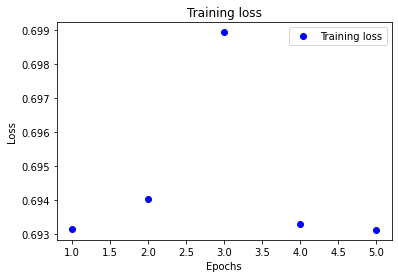

In [38]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') #“bo” is for “blue dot.”
plt.title('Training loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

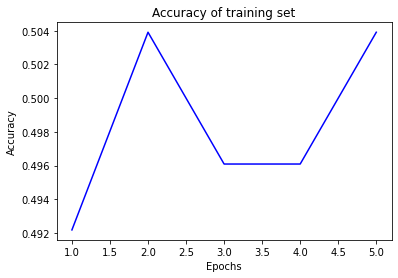

In [39]:
accuracy_values = history_dict['accuracy']
plt.plot(epochs, accuracy_values, 'b', label='Validation loss')#“b” is for “solid blue line.”
plt.title('Accuracy of training set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()